# Previsor de Popularidade um Filme baseado em suas características

## Obtenção dos Dados

In [201]:
# OBS: Como na descrição do trabalho, menciona que a uso da mesma base que o trabalho de web scrapping é opcional,
# decidi utlizar uma outra base que contenha mais dados para uma análise mais completa.

# Fonte: https://www.themoviedb.org/

from os.path import exists
import requests
import json

file_path = 'movies.json'

# Se os já estiverem disponíveis, não é necessário baixá-los novamente
if not exists(file_path):

  api_key = '466eefcef086aaa1375e8ecfebc6a345'
  base_url = 'https://api.themoviedb.org/3'

  response = requests.get('%s/genre/movie/list?api_key=%s' % (base_url, api_key))
  genres = json.loads(response.content)['genres']

  pages_to_fetch = 50
  movies = []
  for genre in genres: 
    for page in range(1, pages_to_fetch + 1):
      print('Obtendo files para o gênero %s: página %d' % (genre['name'], page))
      response = requests.get('%s/search/movie?api_key=%s&query=%s&page=%d' % (base_url, api_key, genre['name'], page))
      movies = movies + json.loads(response.content)['results']

  print('%d filmes foram obtidos' % (len(movies)))

  f = open(file_path, "w")
  f.write(json.dumps(movies))
  f.close()
else:
  print('Os filmes já foram obtidos')

Os filmes já foram obtidos


## Análise Exploratórios

In [202]:
import pandas as pd
movies = pd.read_json('movies.json')

In [203]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12353 entries, 0 to 12352
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              12353 non-null  bool   
 1   backdrop_path      4260 non-null   object 
 2   genre_ids          12353 non-null  object 
 3   id                 12353 non-null  int64  
 4   original_language  12353 non-null  object 
 5   original_title     12353 non-null  object 
 6   overview           12353 non-null  object 
 7   popularity         12353 non-null  float64
 8   poster_path        9003 non-null   object 
 9   release_date       12249 non-null  object 
 10  title              12353 non-null  object 
 11  video              12353 non-null  bool   
 12  vote_average       12353 non-null  float64
 13  vote_count         12353 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 1.2+ MB


In [204]:
movies.describe()

,id,popularity,vote_average,vote_count
count,1.235300e+04,12353.000000,12353.000000,12353.000000
mean,4.758971e+05,2.614875,2.866194,44.439893
std,2.945272e+05,13.524873,3.301434,467.763527
min,5.900000e+01,0.000000,0.000000,0.000000
25%,2.452660e+05,0.600000,0.000000,0.000000
50%,4.566260e+05,0.600000,0.000000,0.000000
75%,7.237920e+05,1.400000,6.000000,4.000000
max,1.021890e+06,798.721000,10.000000,25343.000000


In [205]:
movies.head(5)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/3BPocRQcnZG4BrxocERhP4TCtDY.jpg,"[12, 14, 28, 35, 10751]",9593,en,Last Action Hero,"Following the death of his father, young Danny...",17.818,/8B4aFGBHWmj2F4jkDNHjzSX2GOw.jpg,1993-06-18,Last Action Hero,False,6.4,2150
1,False,/bE6SwIJrDuDchsXXoE2njVFu795.jpg,"[16, 35, 10751]",10715,en,Looney Tunes: Back in Action,Fed up with all the attention going to Bugs Bu...,25.286,/pNrQaH0ATrz9wFrNpwfB1aU4MpK.jpg,2003-11-14,Looney Tunes: Back in Action,False,6.4,1257
2,False,/vcI8kweLIpGv7jb9NWVunOyZ2O7.jpg,[18],9422,en,A Civil Action,Jan Schlickmann is a cynical lawyer who goes o...,14.057,/6VsitR71vVKiGEDFPT71dKigbGN.jpg,1998-12-25,A Civil Action,False,6.4,339
3,False,/cZCz0YHnyTnhCj2BcdcJsjaFP2u.jpg,"[10751, 16, 14]",260234,en,"Monster High: Frights, Camera, Action!",When Draculaura is led to believe she's the ri...,22.891,/kGlTFeilg6RtyYi86kRQRml8CRG.jpg,2014-03-25,"Monster High: Frights, Camera, Action!",False,7.2,101
4,False,/tmpY6f0Lf7Dnx6inByjvHby4AYf.jpg,"[35, 18]",454283,en,Action Point,A daredevil designs and operates his own theme...,10.170,/5lqJx0uNKrD1cEKgaqF1LBsLAoi.jpg,2018-06-01,Action Point,False,5.4,286


### Visualização dos Dados

In [206]:
len(movies[movies['vote_average'] > 0.0])

5781

In [207]:
import numpy as np
len(np.unique(movies['id']))

11951

(array([ 122.,  133.,  134.,  335.,  809., 1412., 1493.,  762.,  231.,
         350.]),
 array([ 0.5 ,  1.45,  2.4 ,  3.35,  4.3 ,  5.25,  6.2 ,  7.15,  8.1 ,
         9.05, 10.  ]),
 <a list of 10 Patch objects>)

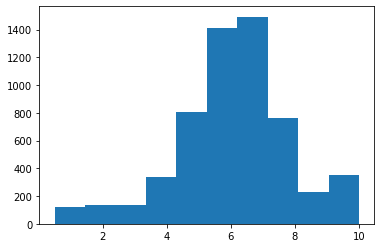

In [208]:
import matplotlib.pyplot as plt
plt.hist(movies[movies['vote_average'] > 0.0]['vote_average'])

## Preparação dos Dados

### Removendo Colunas

In [209]:
# Removendo Colunas
movies = movies.drop('adult', axis=1)
movies = movies.drop('backdrop_path', axis=1)
movies = movies.drop('id', axis=1)
movies = movies.drop('original_language', axis=1)
movies = movies.drop('original_title', axis=1)
movies = movies.drop('overview', axis=1)
movies = movies.drop('poster_path', axis=1)
movies = movies.drop('title', axis=1)
movies = movies.drop('video', axis=1)

In [210]:
movies.isnull().sum()

genre_ids         0
popularity        0
release_date    104
vote_average      0
vote_count        0
dtype: int64

### Removendo Linhas com valores missing

In [211]:
# Removendo linhas com valores missing
movies.dropna(inplace=True)

### Removendo Valores Inconsistentes

In [212]:
movies = movies.drop(movies[movies['vote_average'] <= 0.0].index)

### Reordenando Colunas

In [213]:
movies = movies[['genre_ids', 'release_date', 'vote_count', 'popularity', 'vote_average']]

### Transformando valores

In [214]:
# Usando apenas o ano da data de lançamento
movies['release_date'] = movies['release_date'].apply(lambda date: date[:4])

In [215]:
# Transformando coluna genre_ids
def transform_genre_ids(genre_ids):
  if type(genre_ids) == 'int':
    return genre_ids
  
  if len(genre_ids) == 0:
    return -1

  return genre_ids[0]

movies['genre_ids'] = movies['genre_ids'].apply(transform_genre_ids)

In [216]:
movies = movies.drop(movies[movies['genre_ids'] < 0].index)

In [217]:
len(movies)

5179

In [218]:
# Renomeando colunas
movies = movies.rename(columns={'genre_ids': 'genre_id'})

### Tratando de atributos categóricos

In [219]:
movies.head(1)

,genre_id,release_date,vote_count,popularity,vote_average
0,12,1993,2150,17.818,6.4


In [220]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [221]:
movies['release_date'] = label_encoder.fit_transform(movies['release_date'])

In [222]:
movies['release_date'].head(10)

0     95
1    105
2    100
3    116
4    120
5     90
6     86
7    122
8     90
9     87
Name: release_date, dtype: int64

## Aplicando Regressão Linear Múltipla

### Escalonamento dos Valores

In [223]:
x_movies = movies.iloc[:, 0:4].values
y_movies = movies.iloc[:, 4].values

In [224]:
x_movies.shape, y_movies.shape

((5179, 4), (5179,))

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_movies = scaler.fit_transform(x_movies)

In [226]:
x_movies[0]

array([-0.42371011, -0.10634918,  2.84755931,  0.61265591])

### Divisão entre Treinamento e Teste

In [227]:
from sklearn.model_selection import train_test_split
x_movies_training, x_movies_testing, y_movies_training, y_movies_testing = train_test_split(x_movies, y_movies, test_size = 0.2, random_state = 0)

In [228]:
x_movies_training.shape, y_movies_training.shape

((4143, 4), (4143,))

In [229]:
x_movies_testing.shape, y_movies_testing.shape

((1036, 4), (1036,))

### Aplicando o Modelo

In [230]:
movies.corr()

,genre_id,release_date,vote_count,popularity,vote_average
genre_id,1.000000,0.080566,-0.024534,0.002114,0.081765
release_date,0.080566,1.000000,0.044397,0.095520,0.119372
vote_count,-0.024534,0.044397,1.000000,0.386904,0.056393
popularity,0.002114,0.095520,0.386904,1.000000,0.048297
vote_average,0.081765,0.119372,0.056393,0.048297,1.000000


In [231]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_movies_training, y_movies_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [232]:
regressor.intercept_, regressor.coef_

(6.12160489337604, array([0.10636073, 0.21055461, 0.07611241, 0.02482564]))

## Apresentação dos Resultados

In [233]:
regressor.score(x_movies_testing, y_movies_testing)

0.016676190769862265

In [235]:
# Prevendo um valor
regressor.predict([x_movies_testing[800]])[0], y_movies_testing[800]

(6.240506488982153, 7.0)

In [238]:
predictions = regressor.predict(x_movies_testing)

In [239]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_movies_testing, predictions))
print('MSE:', metrics.mean_squared_error(y_movies_testing, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_movies_testing, predictions)))

MAE: 1.217456982124914
MSE: 2.813852473736126
RMSE: 1.677454164421826
